In [1]:
%pip install ucimlrepo

In [2]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, TargetEncoder, RobustScaler
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif, SelectKBest

from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import pickle

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)

# data (as pandas dataframes)
X = secondary_mushroom.data.features
y = secondary_mushroom.data.targets

# # metadata
# print(secondary_mushroom.metadata)

# # variable information
# print(secondary_mushroom.variables)


In [5]:
# metadata
# print(secondary_mushroom.metadata)

# variable information
# print(secondary_mushroom.variables)

In [6]:
X

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,s,s,y,f,f,f,f,3.93,6.22,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,1.27,f,s,y,f,f,f,f,3.18,5.43,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,1.27,s,s,y,f,f,f,f,3.86,6.37,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,1.24,f,s,y,f,f,f,f,3.56,5.44,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [7]:
y

,class
0,p
1,p
2,p
3,p
4,p
...,...
61064,p
61065,p
61066,p
61067,p


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           46949 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-spacing          36006 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-root             9531 non-null   object 
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  veil-type             3177 non-null   object 
 14  veil-color            7413 non-null   object 
 15  has-ring           

In [9]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   61069 non-null  object
dtypes: object(1)
memory usage: 477.2+ KB


In [10]:
num_f = X.select_dtypes('float64').columns.to_list()
num_f

['cap-diameter', 'stem-height', 'stem-width']

In [11]:
cat_f = X.select_dtypes('object').columns.to_list()
cat_f

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

In [12]:
full_data = pd.concat([X, y] , axis = 1)
y[full_data.duplicated()].value_counts()

,count
class,
p,146


Text(0.5, 1.0, 'Count of the Target Variable')

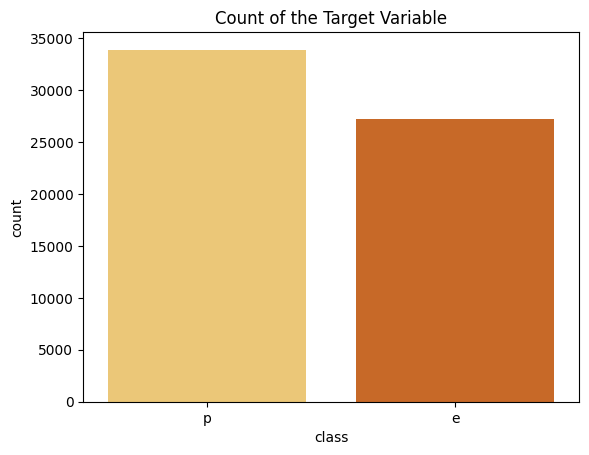

In [13]:
sns.countplot(data = y, x = 'class',hue = 'class', palette = sns.color_palette("YlOrBr", n_colors=2))
plt.title("Count of the Target Variable")

- Since the context of the data doesnt depend on duplicates (trend analysis, ...)
- And the duplicates is causing class imbalance towards the poisnous mushrooms
- The duplicates will be removed

In [14]:
X = X[~full_data.duplicated()]

In [15]:
y = y[~full_data.duplicated()]
full_data.drop_duplicates(inplace=True)

In [16]:
full_data[cat_f].isnull().sum()[full_data[cat_f].isnull().sum() > 0]

,0
cap-surface,14120
gill-attachment,9855
gill-spacing,25062
stem-root,51536
stem-surface,38122
veil-type,57746
veil-color,53510
ring-type,2471
spore-print-color,54597


In [17]:
y.shape

(60923, 1)

Total values : 61069
Total features : 20
Total categorical : 17
Total numeric : 3

---


# Categorical Features :
- 9 features has nulls
- Max nulls 57892 in veil type which has only 3000 correct entries (may remove)
- Same for veil color, spore print color, stem root if not proven useful it will be removed
# Numeric Fetures
- No null features
- cap diameter is in cm
- stem height is in cm
- stem-width is in mm if it doesnt prove multicolinearity and is usefull i will turn to the same unit (cm)


In [18]:
(full_data[cat_f].isnull().sum()[full_data[cat_f].isnull().sum() > 0] / 60923 *100).round(1).sort_values(ascending = False)

,0
veil-type,94.8
spore-print-color,89.6
veil-color,87.8
stem-root,84.6
stem-surface,62.6
gill-spacing,41.1
cap-surface,23.2
gill-attachment,16.2
ring-type,4.1


# Null Features
## High missing


1.   veiltype - > 94%
2.   spore-print-color - > 89%
3.   viel-color ->  88%
4.   stem-root -> 84%
5.   stem-surface
- (there are more than 50% missing data => DROP)

## Moderate
gill-spacing, cap-surface, gill-attachment
- (try using imputation starigies like knn)
## Little
ring-type
- (use mode)





In [19]:
high_missing = ["veil-color", "veil-type", "spore-print-color", "stem-root", "stem-surface"]

In [20]:
full_data.drop(high_missing, inplace=True, axis=1)

In [21]:
full_data["ring-type"] = full_data["ring-type"].fillna(full_data["ring-type"].mode()[0])

In [22]:
full_data.columns

Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season', 'class'],
      dtype='object')

In [23]:
def observed_table(data, f1, f2):
  # [p, e] [u, nan]
  f1_uni = data[f1].unique()
  f2_uni = data[f2].unique()

  # empty table
  obs_table = pd.DataFrame(columns= f2_uni, index = f1_uni)

  # fill
  for val1 in f1_uni:
    for val2 in f2_uni:
      if pd.isna(val1):
        count = data.loc[(data[f1].isna())& (data[f2]== val2)].shape[0]
        obs_table.loc[np.nan, val2] = count
      else:
        count = data.loc[(data[f1] == val1)& (data[f2]== val2)].shape[0]
        obs_table.loc[val1, val2] = count
  return obs_table

- Mid Missingness : ["stem-surface","gill-spacing"
,"cap-surface","gill-attachment"]
- I will checj first for dependecies

In [24]:
alpha = 0.05

In [25]:
mid_missing =  ["gill-spacing" ,"cap-surface","gill-attachment"]

In [26]:
for f in mid_missing:
  obs = observed_table(full_data, f , 'class').astype(int)
  chi2, p, dof, expected = chi2_contingency(obs)
  if p < alpha:
      print("\n👉 Reject H0: Feature and target are dependent (useful feature).")
  else:
      print("\n👉 Fail to reject H0: Feature and target are independent (not useful).")


👉 Reject H0: Feature and target are dependent (useful feature).

👉 Reject H0: Feature and target are dependent (useful feature).

👉 Reject H0: Feature and target are dependent (useful feature).


- It seems all the features are depnedent on the target
- For now i will fill with missng until i visualize then i will split and imputate with knn.

In [27]:
full_data[mid_missing] = full_data[mid_missing].fillna("missing")

In [28]:
full_data.isna().sum()

,0
cap-diameter,0
cap-shape,0
cap-surface,0
cap-color,0
does-bruise-or-bleed,0
gill-attachment,0
gill-spacing,0
gill-color,0
stem-height,0
stem-width,0


In [29]:
full_data.columns

Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season', 'class'],
      dtype='object')

# EDA

## Univariate Distributions

In [30]:
num_f = full_data.select_dtypes('float64').columns.to_list()
cat_f = full_data.select_dtypes('object').columns.to_list()
# num_f
# cat_f

In [31]:
full_data[num_f].describe()

,cap-diameter,stem-height,stem-width
count,60923.000000,60923.000000,60923.000000
mean,6.741957,6.597202,12.178484
std,5.268435,3.358757,10.030361
min,0.380000,0.000000,0.000000
25%,3.490000,4.650000,5.250000
50%,5.880000,5.960000,10.220000
75%,8.550000,7.750000,16.580000
max,62.340000,33.920000,103.910000


In [32]:
full_data[full_data['stem-height']==0].describe(include="all")

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class
count,915.000000,915,915,915,915,915,915,915,915.0,915.0,915,915,915,915,915,915
unique,NaN,1,3,6,1,2,2,2,NaN,NaN,1,2,1,1,4,1
top,NaN,o,s,g,f,f,f,f,NaN,NaN,f,f,f,d,u,p
freq,NaN,915,494,329,915,590,590,590,NaN,NaN,915,574,915,915,320,915
mean,3.906645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
std,0.899322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
min,1.810000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.215000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.860000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.530000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


- it seems valid that there are mushrooms without stem so the 0 and no color in stem height and color is not an error

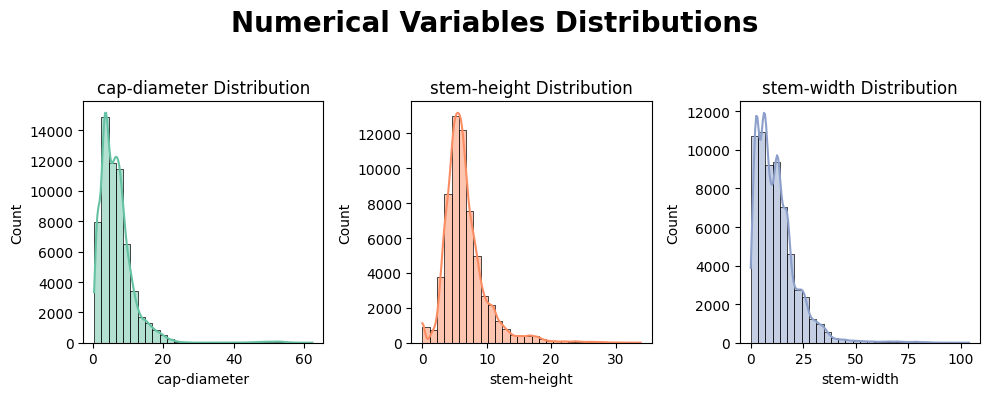

In [33]:
plt.figure(figsize=(10,4))
palette = sns.color_palette("Set2", n_colors=len(num_f))
for i, col in enumerate(num_f):

  plt.subplot(1, 3, i+1)
  sns.histplot(data=full_data, x=col,bins=30,kde=True, color=palette[i])
  plt.title(f"{col} Distribution")

plt.suptitle("Numerical Variables Distributions", fontsize=20, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])

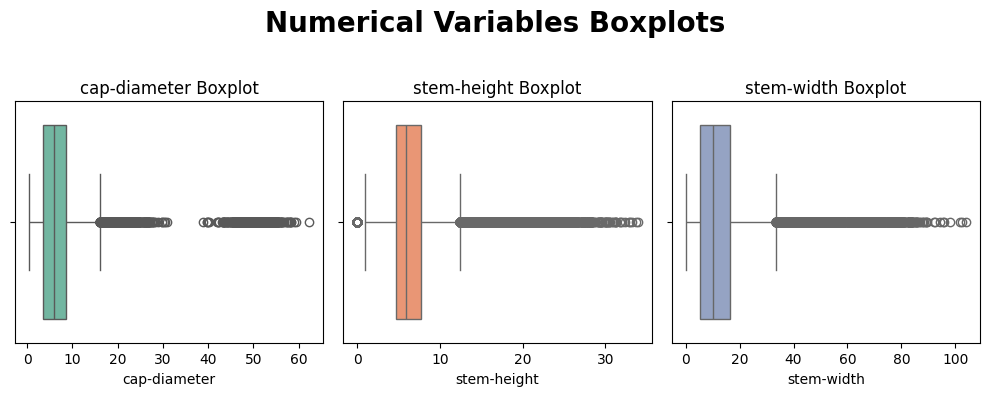

In [34]:
plt.figure(figsize=(10,4))
palette = sns.color_palette("Set2", n_colors=len(num_f))
for i, col in enumerate(num_f):

  plt.subplot(1, 3, i+1)
  sns.boxplot(data=full_data, x=col, color=palette[i])
  plt.title(f"{col} Boxplot")

plt.suptitle("Numerical Variables Boxplots", fontsize=20, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])

- numeric data is sevearly skwed with lots of outliers

In [35]:
cat_f

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-color',
 'has-ring',
 'ring-type',
 'habitat',
 'season',
 'class']

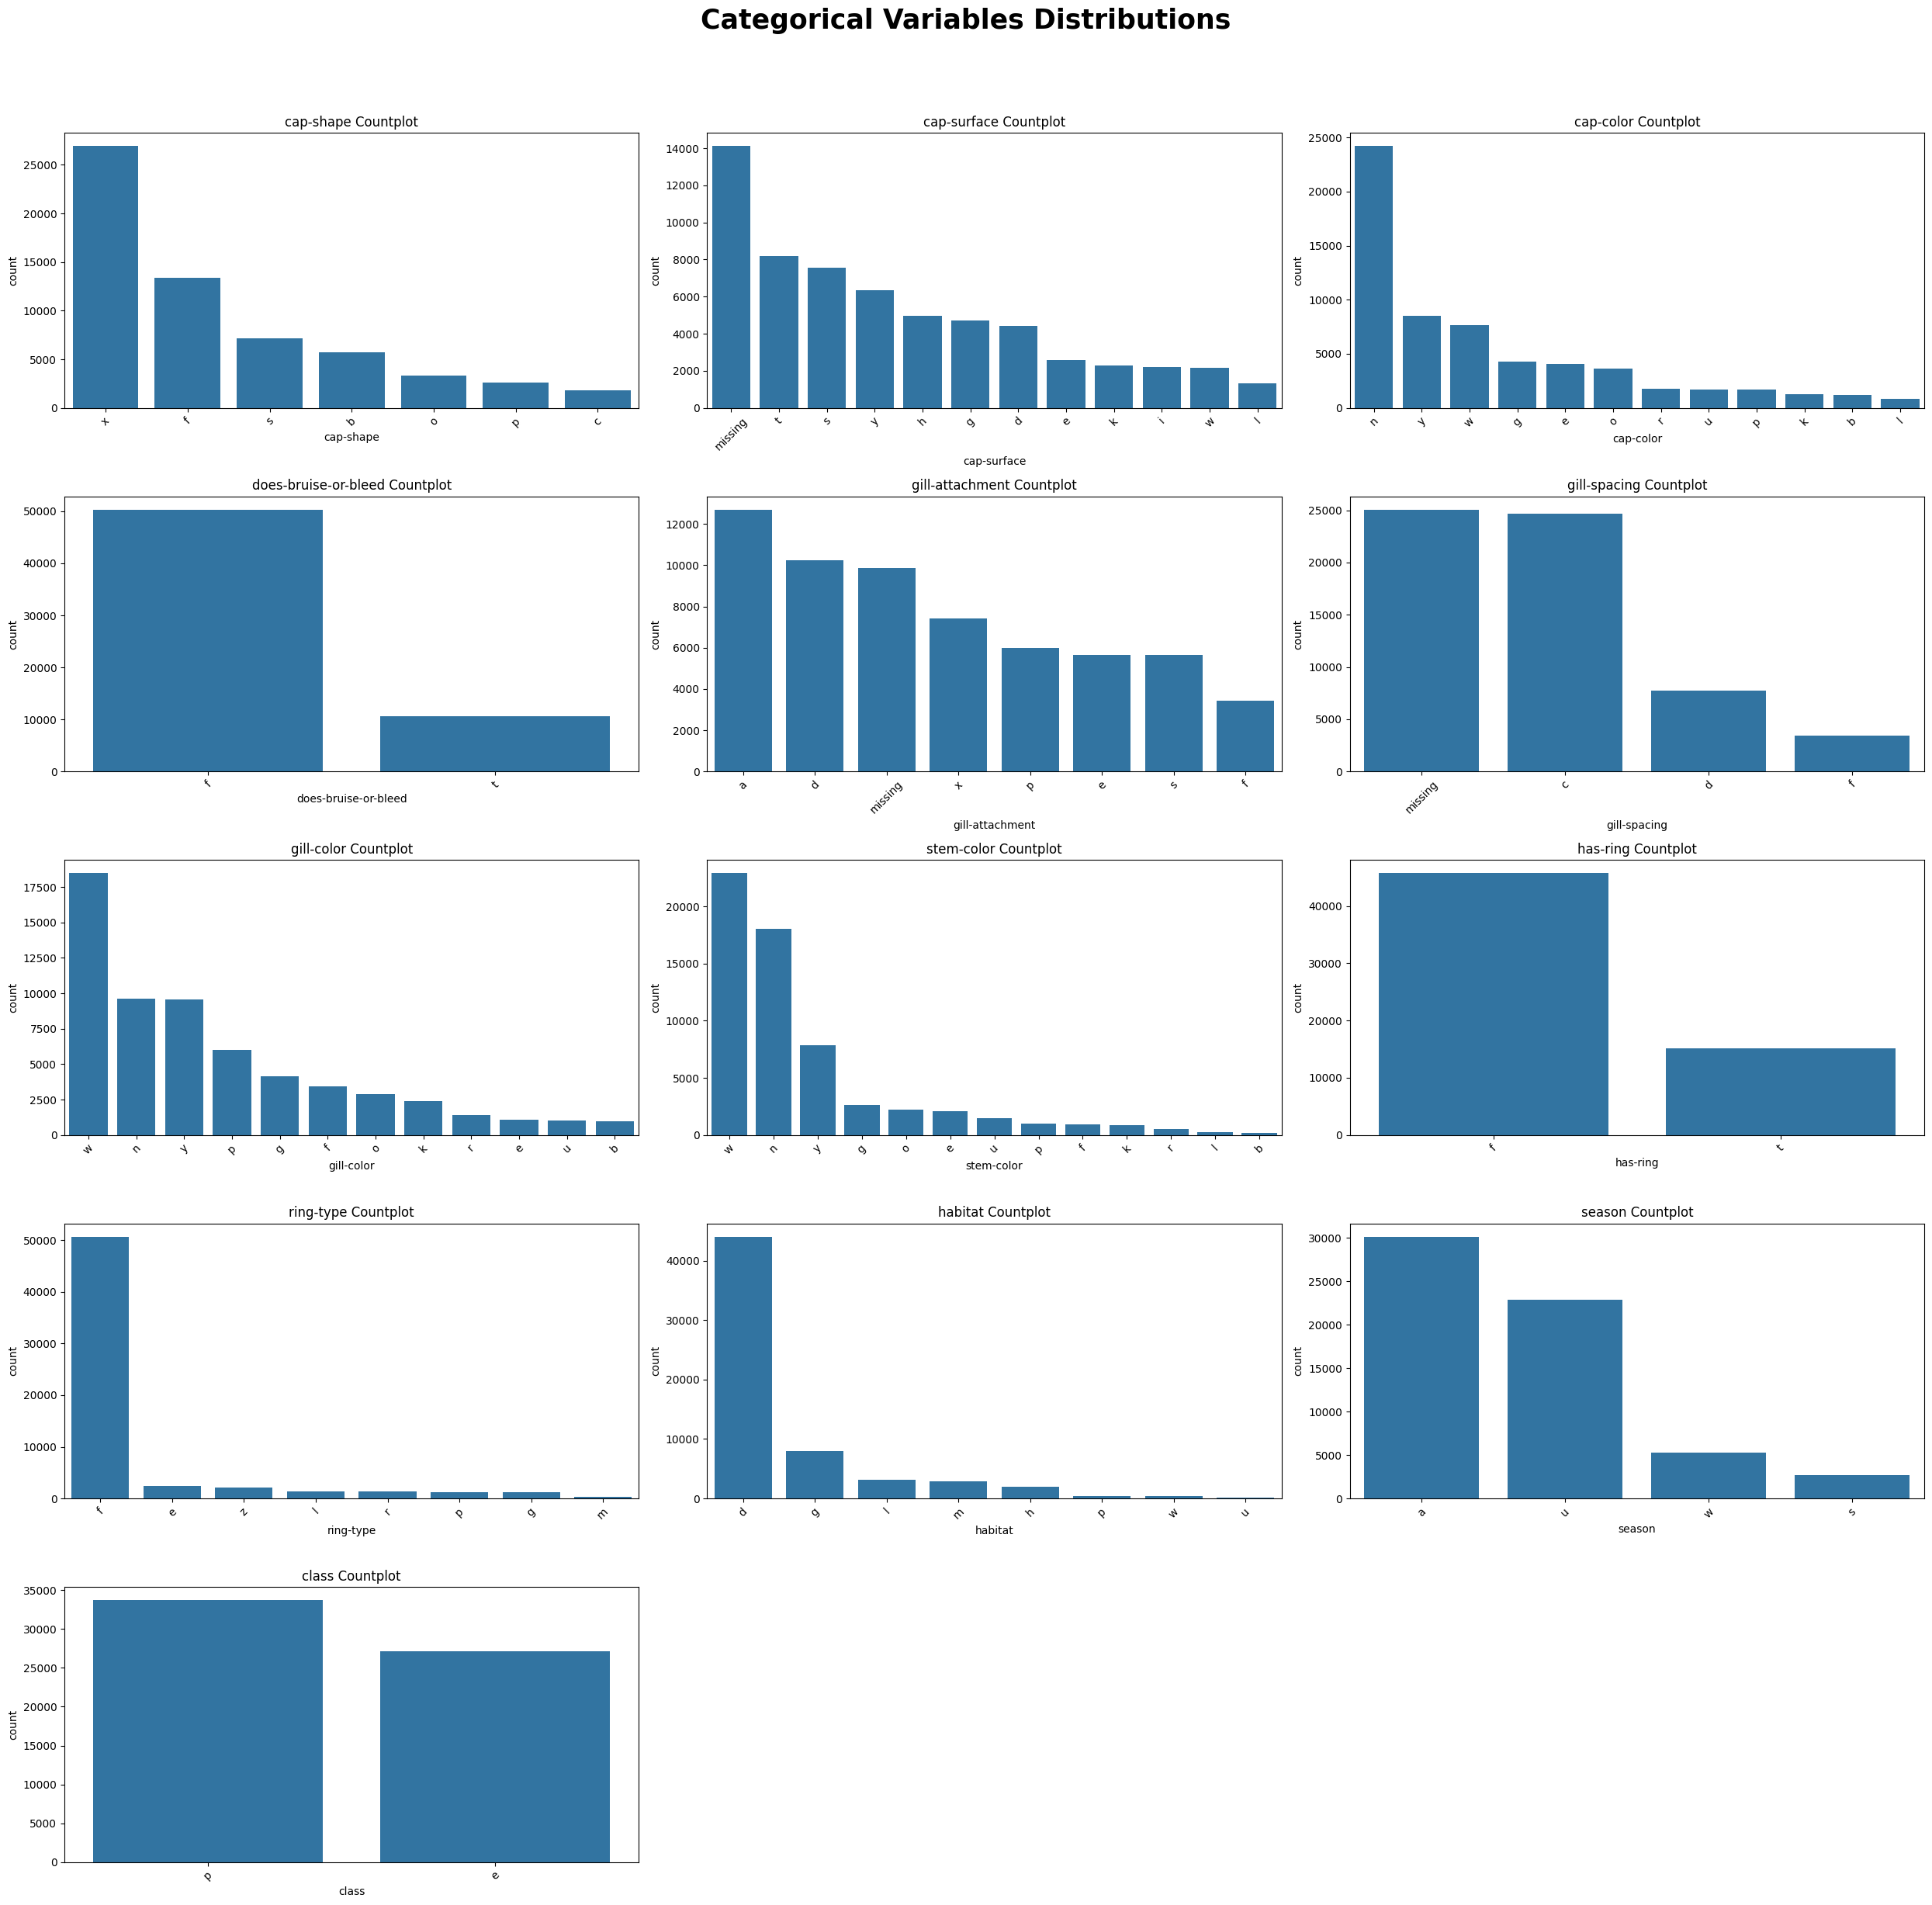

In [36]:
plt.figure(figsize=(25,25))
palette = sns.color_palette("Set2", n_colors=len(num_f))
for i, col in enumerate(cat_f):
    plt.subplot(5, 3, i+1)
    order = full_data[col].value_counts().index
    sns.countplot(data=full_data, x=col, order = order)
    plt.title(f"{col} Countplot")
    plt.xticks(rotation=45)

plt.suptitle("Categorical Variables Distributions", fontsize=25, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])

## BiVariate

In [37]:
cat_f

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-color',
 'has-ring',
 'ring-type',
 'habitat',
 'season',
 'class']

In [38]:
num_f

['cap-diameter', 'stem-height', 'stem-width']

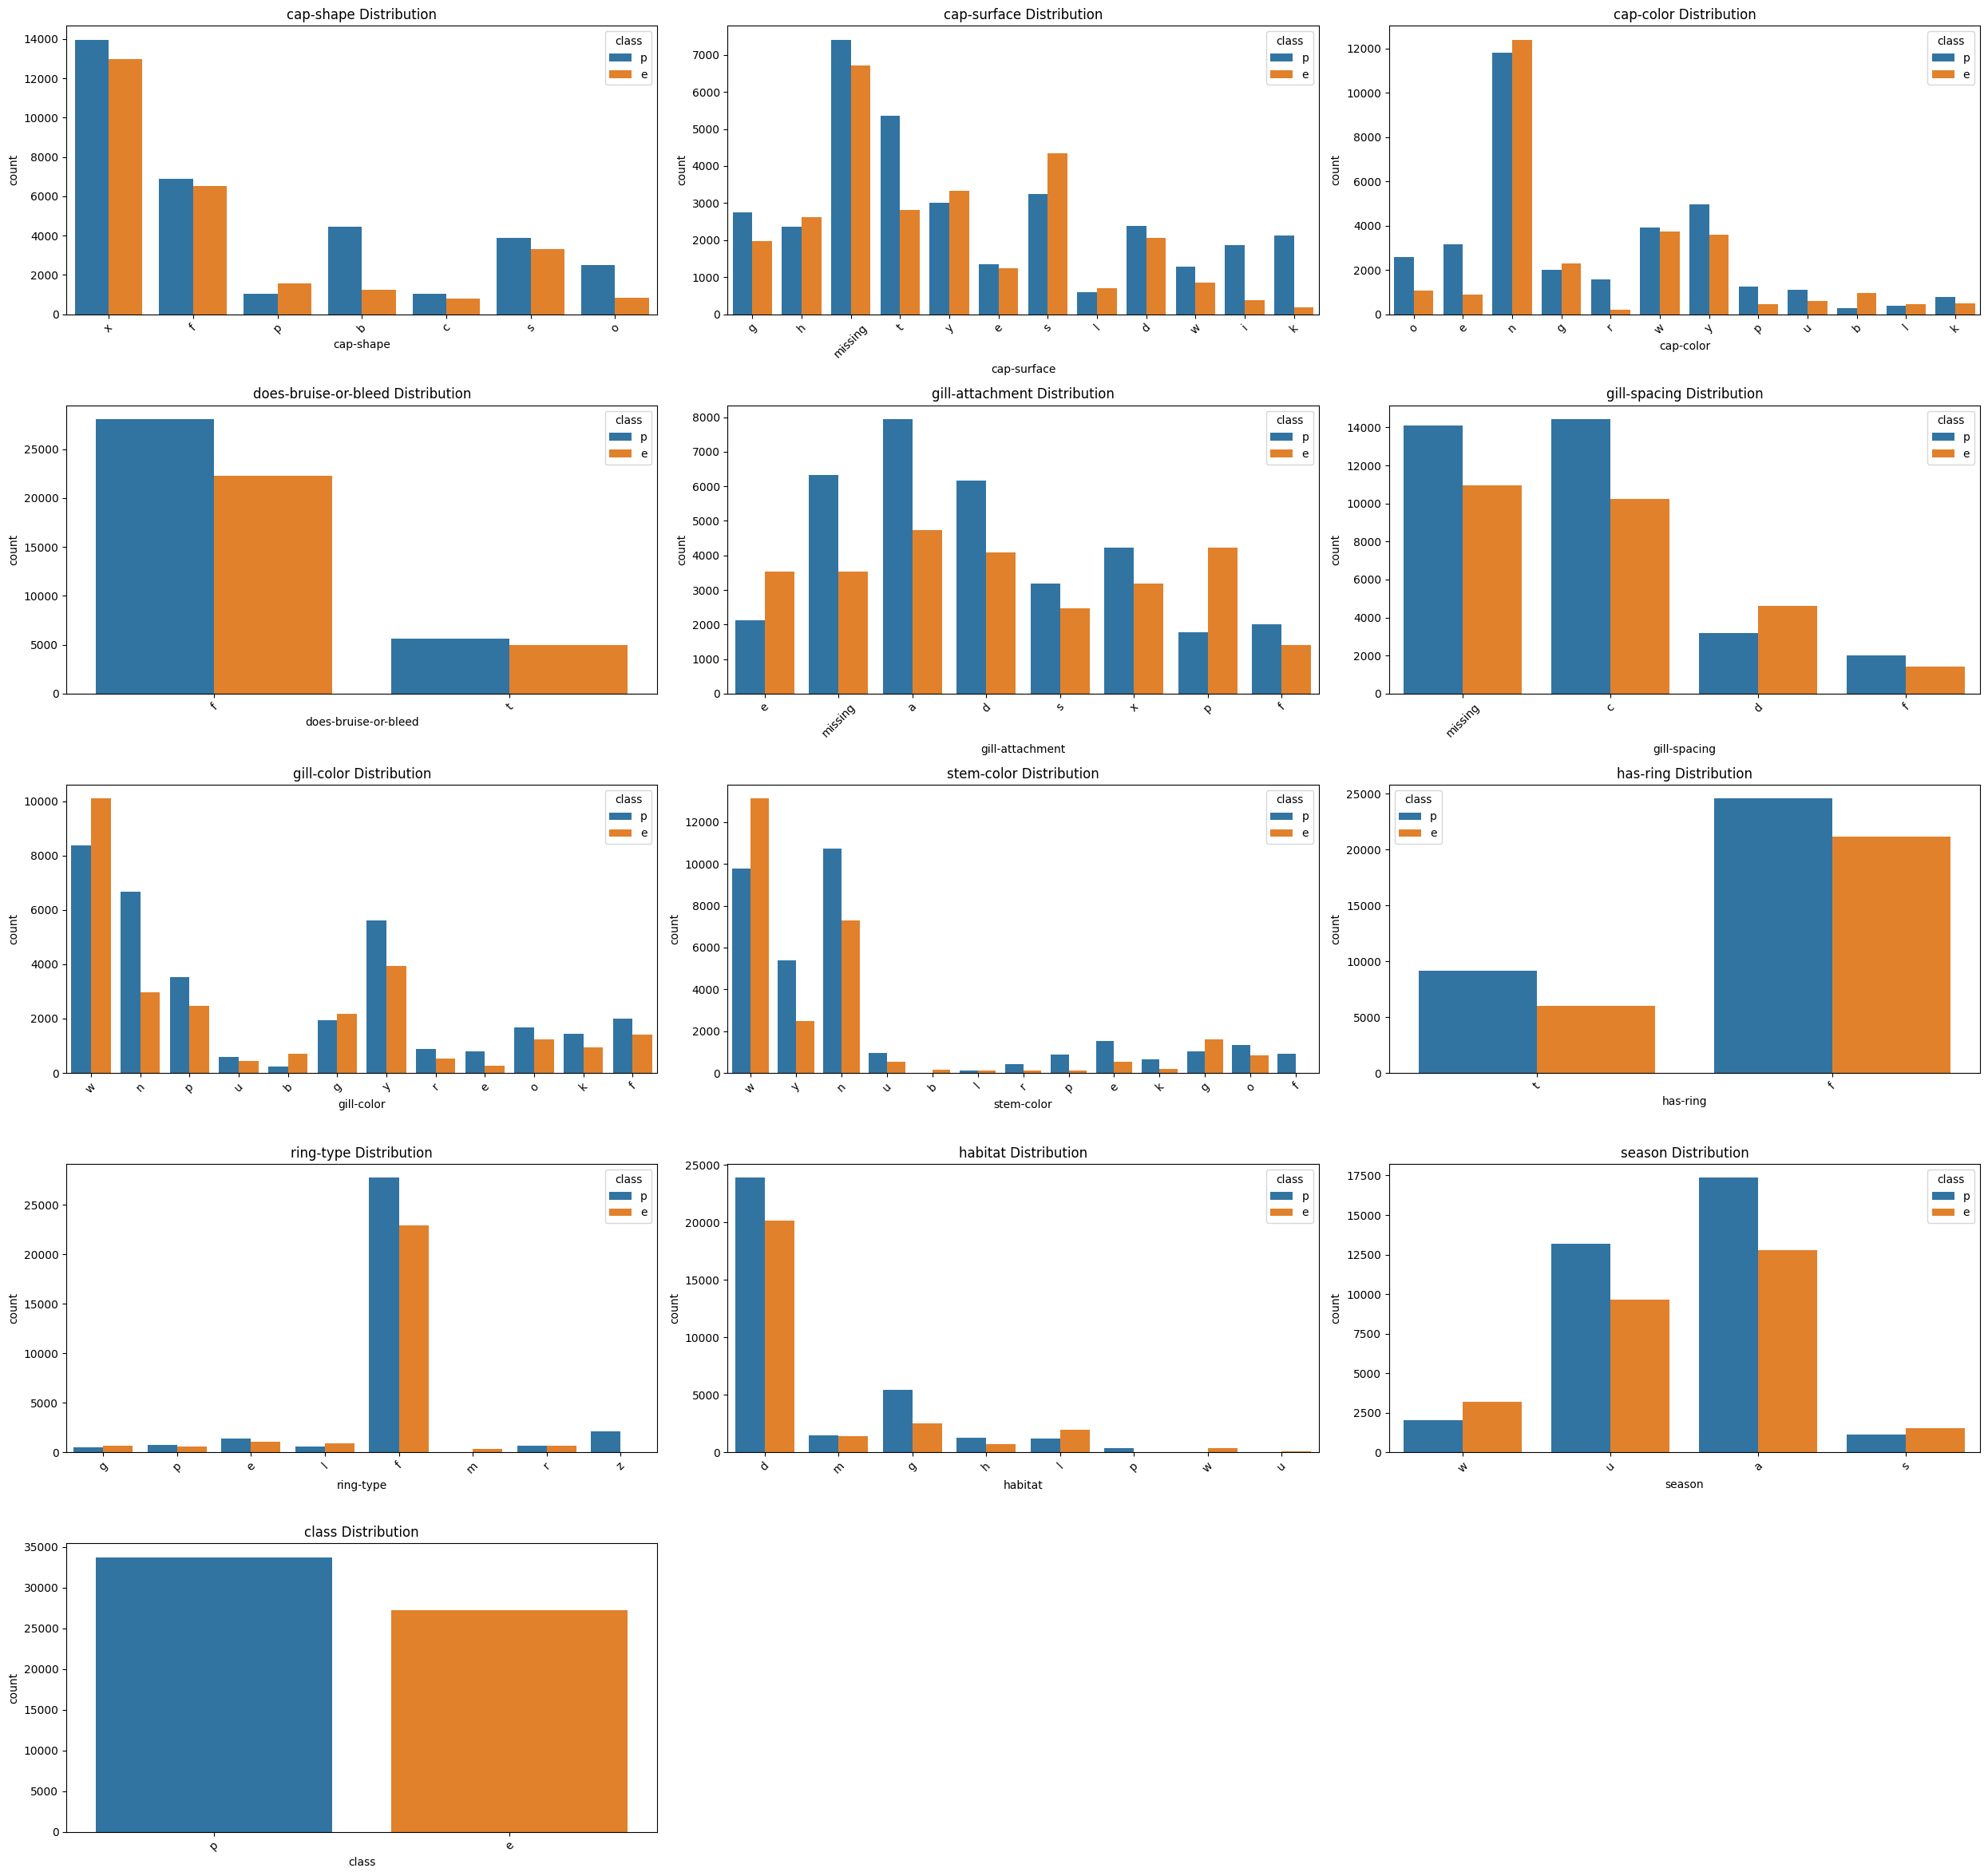

In [39]:
plt.figure(figsize=(25,25))
palette = sns.color_palette("Set2", n_colors=len(num_f))
for i, col in enumerate(cat_f):
    plt.subplot(5, 3, i+1)
    order = full_data[col].value_counts().index
    sns.countplot(data=full_data, x=col ,hue = 'class')
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)

plt.suptitle("", fontsize=25, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])

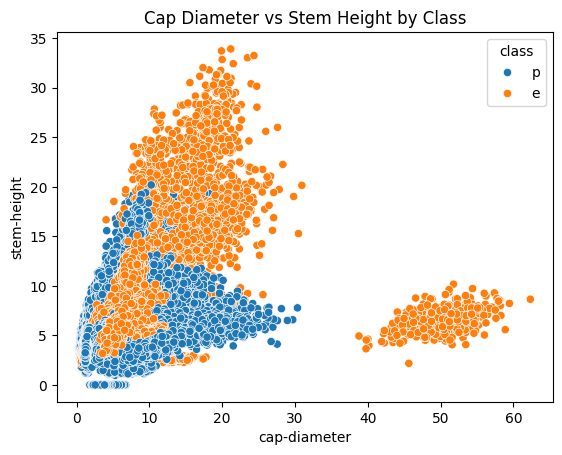

In [40]:
sns.scatterplot(x='cap-diameter', y='stem-height', data=full_data, hue='class')
plt.title('Cap Diameter vs Stem Height by Class')
plt.show()

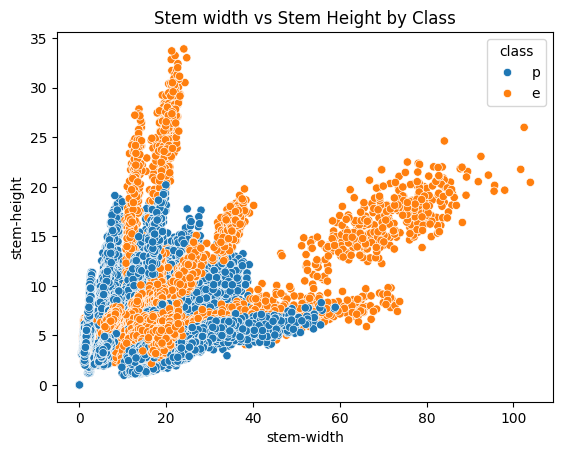

In [41]:
sns.scatterplot(x='stem-width', y='stem-height', data=full_data, hue='class')
plt.title('Stem width vs Stem Height by Class')
plt.show()

- The shape is weird but it looks that at some specific range the data is classied one class

<Axes: >

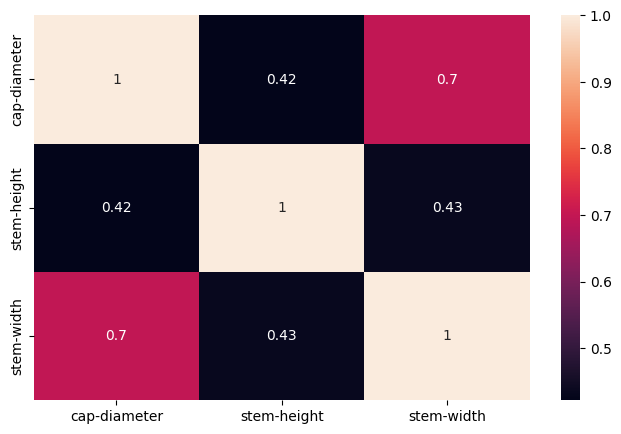

In [42]:
plt.figure(figsize=(8,5))
corr = full_data[num_f].corr()
sns.heatmap(corr, annot=True)

# Model Prep

- Missing Imputer (to do that i need to encode the values with ordinal to avoid sparse matrix in imputing)


  *   Bayesian or frequency Encoding
  *   KNN Imputer


- Scale Numeric data
- Apply feature selection techniques
- Apply resampling techniques


In [43]:
X = full_data.drop('class', axis=1)
y = full_data['class']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [45]:
# X_train

## Encoding

In [46]:
for col in cat_f[:-1]:
  print(f"{col} nunique : {X_train[col].nunique()}\n")

cap-shape nunique : 7

cap-surface nunique : 12

cap-color nunique : 12

does-bruise-or-bleed nunique : 2

gill-attachment nunique : 8

gill-spacing nunique : 4

gill-color nunique : 12

stem-color nunique : 13

has-ring nunique : 2

ring-type nunique : 8

habitat nunique : 8

season nunique : 4



In [47]:
mid_missing

['gill-spacing', 'cap-surface', 'gill-attachment']

- Target encoder: cap-shape,cap-surface, cap-color, gill-attachment, gill-color, stem-color, ring-type, habitat
- Onehot : gill-spacing, season
- Binary : class, has-ring, does-bruise-or-bleed
- The features i want to imputate i will use first label encoder => imputate => reverse => use appropriate encoder

In [48]:
tef = ['cap-shape', 'cap-color', 'gill-color', 'stem-color', 'ring-type', 'habitat', 'gill-attachment', 'cap-surface']#'gill-attachment', 'cap-surface'
ohef = ['season']#'gill-spacing'
bef = ['class','has-ring', 'does-bruise-or-bleed']

In [49]:
X_train[mid_missing] = X_train[mid_missing].replace("missing", np.nan)
X_test[mid_missing] = X_test[mid_missing].replace("missing", np.nan)

In [50]:
te = ce.TargetEncoder(handle_missing='return_nan', handle_unknown='value')
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
le = LabelEncoder()

In [51]:
X_train[tef] = te.fit_transform(X_train[tef], y_train)
X_test[tef] = te.transform(X_test[tef])

In [52]:
X_train_ohe = ohe.fit_transform(X_train[ohef])
X_test_ohe = ohe.transform(X_test[ohef])

In [53]:
X_train_ohe_df = pd.DataFrame(
    X_train_ohe,
    columns=ohe.get_feature_names_out(ohef),
    index=X_train.index
)

X_test_ohe_df = pd.DataFrame(
    X_test_ohe,
    columns=ohe.get_feature_names_out(ohef),
    index=X_test.index
)

In [54]:
for col in bef:
  print(f"{col} nunique : {full_data[col].unique()}\n")

class nunique : ['p' 'e']

has-ring nunique : ['t' 'f']

does-bruise-or-bleed nunique : ['f' 't']



In [55]:
for col in bef:
    if col != "class":
        X_train[col] = X_train[col].map({"t": 1, "f": 0})
        X_test[col]  = X_test[col].map({"t": 1, "f": 0})
    else:
        y_train = y_train.map({"p": 1, "e": 0})
        y_test  = y_test.map({"p": 1, "e": 0})

In [56]:
X_train[cat_f[:-1]].head()

,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-color,has-ring,ring-type,habitat,season
46697,0.514703,0.472837,0.488159,0,NaN,c,0.688461,0.428036,0,0.547071,0.542769,u
15344,0.517991,0.473788,0.488159,0,NaN,NaN,0.453375,0.596209,1,0.565348,0.542769,a
49128,0.517991,0.531496,0.784000,1,0.297597,NaN,0.612789,0.682304,0,0.547071,0.542769,u
42226,0.514703,0.473788,0.508649,0,0.377710,c,0.688461,0.428036,1,0.565348,0.685904,a
39330,0.585180,0.925665,0.581317,1,0.573977,c,0.588924,0.428036,0,0.547071,0.542769,u


In [57]:
X_train.drop(columns =ohef, inplace=True)

In [58]:
X_test.drop(columns =ohef, inplace=True)

In [59]:
X_train_cat = pd.concat([X_train, X_train_ohe_df], axis = 1)
X_test_cat = pd.concat([X_test, X_test_ohe_df], axis = 1)

In [60]:
X_train_cat['gill-spacing'].unique()

array(['c', nan, 'f', 'd'], dtype=object)

In [61]:
X_train_cat['gill-spacing'] = X_train_cat['gill-spacing'].map({"c": 1, "f": 0, "d":2})
X_test_cat['gill-spacing']  = X_test_cat['gill-spacing'].map({"c": 1, "f": 0, "d":2})

In [62]:
X_train_cat.drop(columns =num_f, inplace=True)
X_test_cat.drop(columns =num_f, inplace=True)

In [63]:
X_train_cat.isnull().sum()

,0
cap-shape,0
cap-surface,11285
cap-color,0
does-bruise-or-bleed,0
gill-attachment,7845
gill-spacing,20023
gill-color,0
stem-color,0
has-ring,0
ring-type,0


In [64]:
X_train_cat

,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-color,has-ring,ring-type,habitat,season_s,season_u,season_w
46697,0.514703,0.472837,0.488159,0,NaN,1.0,0.688461,0.428036,0,0.547071,0.542769,0.0,1.0,0.0
15344,0.517991,0.473788,0.488159,0,NaN,NaN,0.453375,0.596209,1,0.565348,0.542769,0.0,0.0,0.0
49128,0.517991,0.531496,0.784000,1,0.297597,NaN,0.612789,0.682304,0,0.547071,0.542769,0.0,1.0,0.0
42226,0.514703,0.473788,0.508649,0,0.377710,1.0,0.688461,0.428036,1,0.565348,0.685904,0.0,0.0,0.0
39330,0.585180,0.925665,0.581317,1,0.573977,1.0,0.588924,0.428036,0,0.547071,0.542769,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11877,0.585180,0.590390,0.488159,1,0.626809,NaN,0.592809,0.596209,0,0.547071,0.542769,0.0,0.0,0.0
18065,0.514703,0.425455,0.488159,0,0.556043,1.0,0.453375,0.428036,0,0.547071,0.389750,0.0,0.0,0.0
19271,0.517991,0.656135,0.705701,0,0.626809,1.0,0.588924,0.601375,0,0.547071,0.685904,0.0,0.0,0.0
21196,0.517991,0.656135,0.488159,0,0.599101,NaN,0.576242,0.601375,0,0.547071,0.542769,0.0,0.0,1.0


## NUM Scaling

In [65]:
rs = RobustScaler()

In [66]:
X_train_scaled = rs.fit_transform(X_train[num_f])
X_test_scaled = rs.transform(X_test[num_f])

In [67]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_f,index= X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_f,index = X_test.index)

In [68]:
X_train_scaled.head()

,cap-diameter,stem-height,stem-width
46697,-0.446640,-0.123377,-0.334802
15344,0.918972,0.243506,1.186784
49128,0.413043,0.165584,0.248458
42226,0.096838,-0.149351,0.225551
39330,0.138340,0.525974,0.282819


In [69]:
X_train_f = pd.concat([X_train_scaled, X_train_cat], axis = 1)
X_test_f = pd.concat([X_test_scaled, X_test_cat], axis = 1)

In [70]:
X_train_f.head()

,cap-diameter,stem-height,stem-width,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-color,has-ring,ring-type,habitat,season_s,season_u,season_w
46697,-0.446640,-0.123377,-0.334802,0.514703,0.472837,0.488159,0,NaN,1.0,0.688461,0.428036,0,0.547071,0.542769,0.0,1.0,0.0
15344,0.918972,0.243506,1.186784,0.517991,0.473788,0.488159,0,NaN,NaN,0.453375,0.596209,1,0.565348,0.542769,0.0,0.0,0.0
49128,0.413043,0.165584,0.248458,0.517991,0.531496,0.784000,1,0.297597,NaN,0.612789,0.682304,0,0.547071,0.542769,0.0,1.0,0.0
42226,0.096838,-0.149351,0.225551,0.514703,0.473788,0.508649,0,0.377710,1.0,0.688461,0.428036,1,0.565348,0.685904,0.0,0.0,0.0
39330,0.138340,0.525974,0.282819,0.585180,0.925665,0.581317,1,0.573977,1.0,0.588924,0.428036,0,0.547071,0.542769,0.0,1.0,0.0


In [71]:
X_train_f.isnull().sum()

,0
cap-diameter,0
stem-height,0
stem-width,0
cap-shape,0
cap-surface,11285
cap-color,0
does-bruise-or-bleed,0
gill-attachment,7845
gill-spacing,20023
gill-color,0


## KNN Imputer
- fix the gill_spacing issue

In [72]:
imputer = KNNImputer(n_neighbors=5)

In [73]:
X_train_f[mid_missing] = imputer.fit_transform(X_train_f[mid_missing])
X_test_f[mid_missing]  = imputer.transform(X_test_f[mid_missing])

In [74]:
X_train_f.head()

,cap-diameter,stem-height,stem-width,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-color,has-ring,ring-type,habitat,season_s,season_u,season_w
46697,-0.446640,-0.123377,-0.334802,0.514703,0.472837,0.488159,0,0.598503,1.0,0.688461,0.428036,0,0.547071,0.542769,0.0,1.0,0.0
15344,0.918972,0.243506,1.186784,0.517991,0.473788,0.488159,0,0.413376,1.0,0.453375,0.596209,1,0.565348,0.542769,0.0,0.0,0.0
49128,0.413043,0.165584,0.248458,0.517991,0.531496,0.784000,1,0.297597,1.0,0.612789,0.682304,0,0.547071,0.542769,0.0,1.0,0.0
42226,0.096838,-0.149351,0.225551,0.514703,0.473788,0.508649,0,0.377710,1.0,0.688461,0.428036,1,0.565348,0.685904,0.0,0.0,0.0
39330,0.138340,0.525974,0.282819,0.585180,0.925665,0.581317,1,0.573977,1.0,0.588924,0.428036,0,0.547071,0.542769,0.0,1.0,0.0


In [75]:
X_train_f.isnull().sum()

,0
cap-diameter,0
stem-height,0
stem-width,0
cap-shape,0
cap-surface,0
cap-color,0
does-bruise-or-bleed,0
gill-attachment,0
gill-spacing,0
gill-color,0


In [76]:
X_train_f['gill-spacing'].unique()

array([1.        , 1.6       , 0.        , 2.        , 1.2       ,
       1.12063382, 1.8       , 1.4       , 0.8       ])

In [77]:
X_test_f['gill-spacing'].unique()

array([0.        , 1.        , 1.4       , 1.6       , 2.        ,
       0.8       , 1.2       , 1.12063382, 1.8       ])

In [78]:
X_train_f['gill-spacing'] = X_train_f['gill-spacing'].round().astype(int)
X_test_f['gill-spacing'] = X_test_f['gill-spacing'].round().astype(int)

In [79]:
X_train_f['gill-spacing'].unique()

array([1, 2, 0])

In [80]:
X_train_f['gill-spacing'].unique()

array([1, 2, 0])

In [81]:
X_train_f['gill-spacing'] = X_train_f['gill-spacing'].map({1: "c", 0: "f", 2: "d"})
X_test_f['gill-spacing']  = X_test_f['gill-spacing'].map({1: "c", 0: "f", 2: "d"})

In [82]:
X_train_f

,cap-diameter,stem-height,stem-width,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-color,has-ring,ring-type,habitat,season_s,season_u,season_w
46697,-0.446640,-0.123377,-0.334802,0.514703,0.472837,0.488159,0,0.598503,c,0.688461,0.428036,0,0.547071,0.542769,0.0,1.0,0.0
15344,0.918972,0.243506,1.186784,0.517991,0.473788,0.488159,0,0.413376,c,0.453375,0.596209,1,0.565348,0.542769,0.0,0.0,0.0
49128,0.413043,0.165584,0.248458,0.517991,0.531496,0.784000,1,0.297597,c,0.612789,0.682304,0,0.547071,0.542769,0.0,1.0,0.0
42226,0.096838,-0.149351,0.225551,0.514703,0.473788,0.508649,0,0.377710,c,0.688461,0.428036,1,0.565348,0.685904,0.0,0.0,0.0
39330,0.138340,0.525974,0.282819,0.585180,0.925665,0.581317,1,0.573977,c,0.588924,0.428036,0,0.547071,0.542769,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11877,-0.958498,-0.396104,-0.811454,0.585180,0.590390,0.488159,1,0.626809,d,0.592809,0.596209,0,0.547071,0.542769,0.0,0.0,0.0
18065,0.164032,-0.194805,0.011454,0.514703,0.425455,0.488159,0,0.556043,c,0.453375,0.428036,0,0.547071,0.389750,0.0,0.0,0.0
19271,-0.492095,-0.068182,-0.376211,0.517991,0.656135,0.705701,0,0.626809,c,0.588924,0.601375,0,0.547071,0.685904,0.0,0.0,0.0
21196,-0.290514,0.048701,-0.221145,0.517991,0.656135,0.488159,0,0.599101,c,0.576242,0.601375,0,0.547071,0.542769,0.0,0.0,1.0


In [83]:
X_test_f.isnull().sum()

,0
cap-diameter,0
stem-height,0
stem-width,0
cap-shape,0
cap-surface,0
cap-color,0
does-bruise-or-bleed,0
gill-attachment,0
gill-spacing,0
gill-color,0


In [84]:
ohe2 = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

In [85]:
spacing_ohe_train = ohe2.fit_transform(X_train_f[['gill-spacing']])
spacing_ohe_test = ohe2.transform(X_test_f[['gill-spacing']])

In [86]:
spacing_ohe_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [87]:
spacing_train = pd.DataFrame(
    spacing_ohe_train,
    columns=ohe2.get_feature_names_out(['gill-spacing']),
    index=X_train_f.index
)

spacing_test = pd.DataFrame(
    spacing_ohe_test,
    columns=ohe2.get_feature_names_out(['gill-spacing']),
    index=X_test_f.index
)

In [88]:
spacing_test

,gill-spacing_c,gill-spacing_d,gill-spacing_f
59845,0.0,0.0,1.0
617,1.0,0.0,0.0
30347,1.0,0.0,0.0
49028,1.0,0.0,0.0
10037,0.0,1.0,0.0
...,...,...,...
31573,1.0,0.0,0.0
35985,1.0,0.0,0.0
28229,1.0,0.0,0.0
3791,1.0,0.0,0.0


In [89]:
X_train_f.drop(columns = 'gill-spacing', inplace=True)

In [90]:
X_test_f.drop(columns = 'gill-spacing', inplace=True)

In [91]:
X_train_f = pd.concat([X_train_f, spacing_train], axis = 1)
X_test_f = pd.concat([X_test_f, spacing_test], axis = 1)

In [92]:
X_train_f.columns

Index(['cap-diameter', 'stem-height', 'stem-width', 'cap-shape', 'cap-surface',
       'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color',
       'stem-color', 'has-ring', 'ring-type', 'habitat', 'season_s',
       'season_u', 'season_w', 'gill-spacing_c', 'gill-spacing_d',
       'gill-spacing_f'],
      dtype='object')

## OverSampling

In [93]:
smote = SMOTE(random_state=42)

In [94]:
X_train_smote,y_train_smote = smote.fit_resample(X_train_f, y_train)

In [95]:
print(f"Shape before smote : {X_train_f.shape}\nShape after smote : {X_train_smote.shape}")

Shape before smote : (48738, 19)
Shape after smote : (53986, 19)


# Feature selection

In [96]:
f_values, p_values = f_classif(X_train_f, y_train)

In [97]:
anova_importance = pd.DataFrame({
    "Feature": X_train_f.columns,
    "ANOVA_F": f_values,
    "ANOVA_pval": p_values
}).sort_values("ANOVA_F", ascending=False)

In [98]:
# anova_importance

- This tells that the three numeric features are very importanat to the target

In [99]:
mi_scores = mutual_info_classif(X_train_f, y_train, random_state=42)

mi_importance = pd.DataFrame({
    "Feature": X_train_f.columns,
    "MI_Score": mi_scores
}).sort_values("MI_Score", ascending=False)

In [100]:
# mi_importance

In [101]:
feature_importance = anova_importance.merge(mi_importance, on="Feature")
feature_importance

,Feature,ANOVA_F,ANOVA_pval,MI_Score
0,stem-color,3819.215860,0.000000e+00,0.040202
1,cap-color,3030.155878,0.000000e+00,0.029531
2,cap-surface,2711.514652,0.000000e+00,0.058672
3,gill-attachment,2134.653436,0.000000e+00,0.060704
4,ring-type,2008.095068,0.000000e+00,0.029679
5,stem-width,1915.189576,0.000000e+00,0.061080
6,gill-color,1843.426536,0.000000e+00,0.019084
7,cap-shape,1810.935039,0.000000e+00,0.019221
8,cap-diameter,1624.252948,0.000000e+00,0.031430
9,habitat,1562.567140,0.000000e+00,0.022446


In [102]:
X_train_f.drop(columns = 'gill-spacing_f', inplace=True)
X_test_f.drop(columns = 'gill-spacing_f', inplace=True)

# Modeling

In [103]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, plot_importance=False):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"{model_name}")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy:  {test_acc:.4f}")

    # Train
    print("\n--- Train Set ---")
    print("Classification Report:\n", classification_report(y_train, y_train_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

    # Test
    print("\n--- Test Set ---")
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

    # Tree
    if plot_importance and hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(10,6))
        sns.barplot(x=importances[indices], y=X_train.columns[indices])
        plt.title(f"{model_name} - Feature Importance")
        plt.show()

## Logistic Regression

In [104]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

In [105]:
grid_lr = GridSearchCV(LogisticRegression(max_iter=5000), param_grid_lr, cv=3, n_jobs=-1, scoring='accuracy')
grid_lr.fit(X_train_f, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=5000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [106]:
best_lr = grid_lr.best_estimator_
print("Best LR params:", grid_lr.best_params_)

Best LR params: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}


In [107]:
evaluate_model(best_lr, X_train_f, y_train, X_test_f, y_test, "Logistic Regression")

Logistic Regression
Train Accuracy: 0.7532
Test Accuracy:  0.7520

--- Train Set ---
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72     21745
           1       0.78      0.78      0.78     26993

    accuracy                           0.75     48738
   macro avg       0.75      0.75      0.75     48738
weighted avg       0.75      0.75      0.75     48738

Confusion Matrix:
 [[15689  6056]
 [ 5973 21020]]

--- Test Set ---
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72      5436
           1       0.77      0.79      0.78      6749

    accuracy                           0.75     12185
   macro avg       0.75      0.75      0.75     12185
weighted avg       0.75      0.75      0.75     12185

Confusion Matrix:
 [[3864 1572]
 [1450 5299]]


## Decision Tree

In [108]:
param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [109]:
rand_dt = RandomizedSearchCV(DecisionTreeClassifier(), param_dist_dt, cv=3, n_iter=10, n_jobs=-1, random_state=42)
rand_dt.fit(X_train_f, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 20, 50],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42)

In [110]:
best_dt = rand_dt.best_estimator_
print("Best DT params:", rand_dt.best_params_)

Best DT params: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}


Decision Tree
Train Accuracy: 1.0000
Test Accuracy:  0.9971

--- Train Set ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21745
           1       1.00      1.00      1.00     26993

    accuracy                           1.00     48738
   macro avg       1.00      1.00      1.00     48738
weighted avg       1.00      1.00      1.00     48738

Confusion Matrix:
 [[21745     0]
 [    0 26993]]

--- Test Set ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      6749

    accuracy                           1.00     12185
   macro avg       1.00      1.00      1.00     12185
weighted avg       1.00      1.00      1.00     12185

Confusion Matrix:
 [[5418   18]
 [  17 6732]]


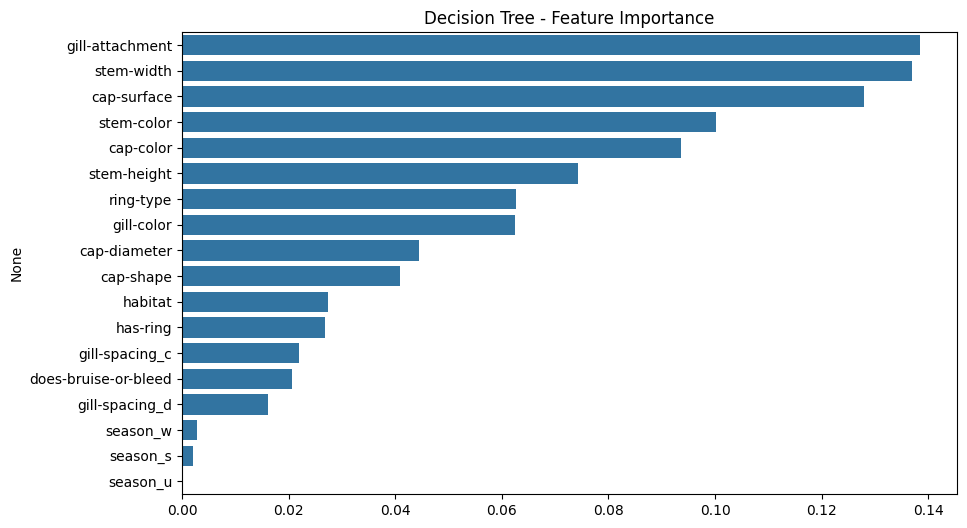

In [111]:
evaluate_model(best_dt, X_train_f, y_train, X_test_f, y_test, "Decision Tree", plot_importance=True)

## Random Forest

In [112]:
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [113]:
rand_rf = RandomizedSearchCV(RandomForestClassifier(), param_dist_rf, cv=3, n_iter=10, n_jobs=-1, random_state=42)
rand_rf.fit(X_train_f, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [114]:
best_rf = rand_rf.best_estimator_
print("Best RF params:", rand_rf.best_params_)

Best RF params: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}


Random Forest
Train Accuracy: 1.0000
Test Accuracy:  0.9999

--- Train Set ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21745
           1       1.00      1.00      1.00     26993

    accuracy                           1.00     48738
   macro avg       1.00      1.00      1.00     48738
weighted avg       1.00      1.00      1.00     48738

Confusion Matrix:
 [[21745     0]
 [    0 26993]]

--- Test Set ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      6749

    accuracy                           1.00     12185
   macro avg       1.00      1.00      1.00     12185
weighted avg       1.00      1.00      1.00     12185

Confusion Matrix:
 [[5436    0]
 [   1 6748]]


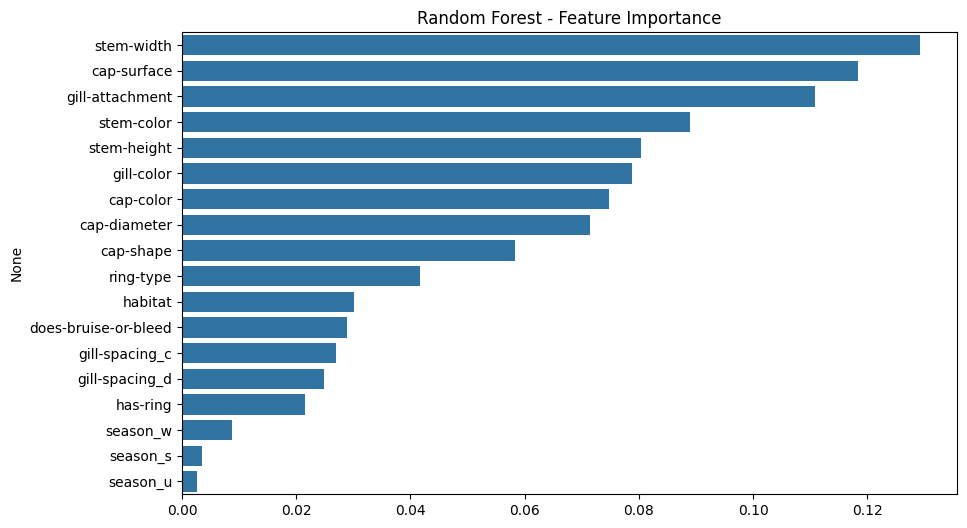

In [115]:
evaluate_model(best_rf, X_train_f, y_train, X_test_f, y_test, "Random Forest", plot_importance=True)

## SVM

In [116]:
param_dist_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [127]:
# rand_svm = RandomizedSearchCV(SVC('kernel': 'rbf', 'gamma': 'scale', 'C': 10), param_dist_svm, cv=3, n_iter=10, n_jobs=-1, random_state=42)
# rand_svm.fit(X_train_f, y_train)

In [128]:
rand_svm = SVC(kernel='rbf', gamma= 'scale', C= 10)
rand_svm.fit(X_train_f, y_train)

SVC(C=10)

In [ ]:
# best_svm = rand_svm.best_estimator_
# print("Best SVM params:", rand_svm.best_params_)

In [129]:
evaluate_model(rand_svm, X_train_f, y_train, X_test_f, y_test, "SVM")

SVM
Train Accuracy: 0.9606
Test Accuracy:  0.9615

--- Train Set ---
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96     21745
           1       0.96      0.97      0.96     26993

    accuracy                           0.96     48738
   macro avg       0.96      0.96      0.96     48738
weighted avg       0.96      0.96      0.96     48738

Confusion Matrix:
 [[20643  1102]
 [  820 26173]]

--- Test Set ---
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      5436
           1       0.96      0.97      0.97      6749

    accuracy                           0.96     12185
   macro avg       0.96      0.96      0.96     12185
weighted avg       0.96      0.96      0.96     12185

Confusion Matrix:
 [[5148  288]
 [ 181 6568]]


## KNN

In [120]:
param_dist_knn = {
    'n_neighbors': list(range(3, 20)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [121]:
rand_knn = RandomizedSearchCV(KNeighborsClassifier(), param_dist_knn, cv=3, n_iter=10, n_jobs=-1, random_state=42)
rand_knn.fit(X_train_f, y_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10,
                                                        11, 12, 13, 14, 15, 16,
                                                        17, 18, 19],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

In [122]:
best_knn = rand_knn.best_estimator_
print("Best KNN params:", rand_knn.best_params_)

Best KNN params: {'weights': 'distance', 'p': 1, 'n_neighbors': 4}


In [123]:
evaluate_model(best_knn, X_train_f, y_train, X_test_f, y_test, "KNN")

KNN
Train Accuracy: 1.0000
Test Accuracy:  0.9968

--- Train Set ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21745
           1       1.00      1.00      1.00     26993

    accuracy                           1.00     48738
   macro avg       1.00      1.00      1.00     48738
weighted avg       1.00      1.00      1.00     48738

Confusion Matrix:
 [[21745     0]
 [    0 26993]]

--- Test Set ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      6749

    accuracy                           1.00     12185
   macro avg       1.00      1.00      1.00     12185
weighted avg       1.00      1.00      1.00     12185

Confusion Matrix:
 [[5410   26]
 [  13 6736]]


## Naive Bayes

In [124]:
nb = GaussianNB()
nb.fit(X_train_f, y_train)

GaussianNB()

In [125]:
evaluate_model(nb, X_train_f, y_train, X_test_f, y_test, "Naive Bayes")

Naive Bayes
Train Accuracy: 0.7086
Test Accuracy:  0.7042

--- Train Set ---
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.65      0.67     21745
           1       0.73      0.75      0.74     26993

    accuracy                           0.71     48738
   macro avg       0.71      0.70      0.70     48738
weighted avg       0.71      0.71      0.71     48738

Confusion Matrix:
 [[14198  7547]
 [ 6657 20336]]

--- Test Set ---
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.64      0.66      5436
           1       0.72      0.76      0.74      6749

    accuracy                           0.70     12185
   macro avg       0.70      0.70      0.70     12185
weighted avg       0.70      0.70      0.70     12185

Confusion Matrix:
 [[3469 1967]
 [1637 5112]]


In [130]:
models = {
    "Logistic Regression": best_lr,
    "Decision Tree": best_dt,
    "Random Forest": best_rf,
    "SVM": rand_svm,
    "KNN": best_knn,
    "Naive Bayes": nb
}

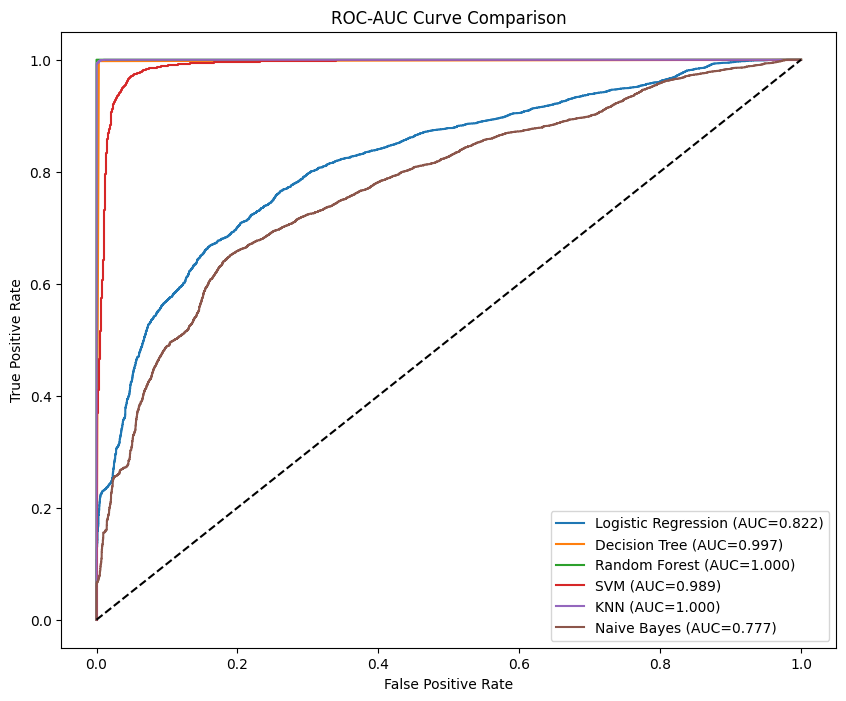

In [133]:
plt.figure(figsize=(10,8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_f)[:,1]
    else:
        y_prob = model.decision_function(X_test_f)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve Comparison")
plt.legend()

## Comarison In preformance

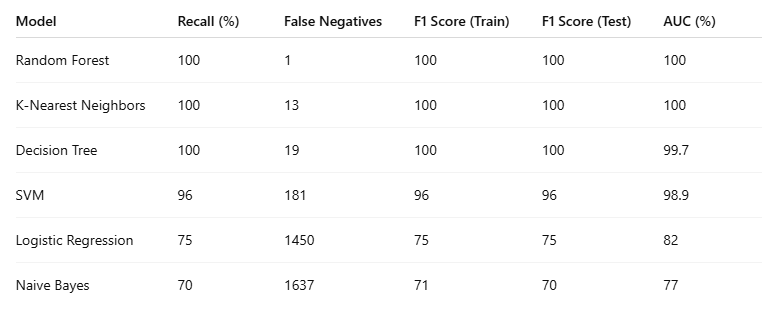

In [136]:
for name, model in models.items():
    filename = f"{name}.pkl"
    with open(filename, "wb") as f:
        pickle.dump(model, f)
    print(f"Saved {name} to {filename}")

Saved Logistic Regression to Logistic Regression.pkl
Saved Decision Tree to Decision Tree.pkl
Saved Random Forest to Random Forest.pkl
Saved SVM to SVM.pkl
Saved KNN to KNN.pkl
Saved Naive Bayes to Naive Bayes.pkl


## Mushroom Classification Project

### Problem Description
The goal of this project is to classify mushrooms as **edible (e)** or **poisonous (p)** based on 20 descriptive features such as cap shape, cap color, stem characteristics, habitat, and season.  
This is a **binary classification problem** where the target variable is the mushroom class (`edible` or `poisonous`).  

---

### Project Workflow

#### 1. Exploratory Data Analysis (EDA)
- Inspect the dataset structure (rows, columns, data types). DONE
- Check for missing values and duplicates.  DONE
- Visualize distributions of categorical features (bar plots) and numeric features (histograms, boxplots).  DONE
- Explore correlations between features and the target class.  DONE
- Look for class imbalance in the target variable (edible vs poisonous). DONE

#### 2. Data Cleaning & Preprocessing
- Handle missing values or unknown entries if present.  DONE
- Encode categorical features (e.g., **One-Hot Encoding** or **Label Encoding**).  DONE
- Scale numerical features (e.g., **StandardScaler** or **MinMaxScaler**). DONE
- Stratify the dataset when splitting into **training and test sets** to maintain class balance.  DONE
- If class imbalance is significant, apply oversampling techniques (e.g., **SMOTE**).  DONE

#### 3. Feature Selection
To reduce dimensionality and improve generalization, apply feature selection techniques such as:  
- **Filter Methods:** Use statistical tests (e.g., Chi-square, ANOVA F-test, mutual information) to rank features.  
- **Wrapper Methods:** Apply Recursive Feature Elimination (**RFE**) with models like Logistic Regression or Decision Trees.  
- **Embedded Methods:** Leverage feature importance from models (e.g., Decision Tree, Random Forest, Lasso Regression).  
- Compare model performance before and after feature selection to evaluate impact.  ❎

#### 4. Model Training & Evaluation
Train and evaluate the following classification models:  
- **Logistic Regression**  
- **Decision Tree**  
- **Random Forest**  
- **Support Vector Machine (SVM)**  
- **K-Nearest Neighbors (KNN)**  
- **Naive Bayes**  

For each model:  
- Train on the **training set**.  
- Evaluate on the **test set** using:  
  - **Classification Report** (Precision, Recall, F1-score, Accuracy)  
  - **Confusion Matrix**  
  - **Cross-validation (optional)** for stability check  ❎

#### 5. Hyperparameter Tuning
To improve model performance, apply hyperparameter optimization techniques:  
- **Grid Search:** Exhaustively search all combinations of parameters (good for small parameter spaces).  
- **Random Search:** Randomly sample parameter combinations (more efficient for large parameter spaces).  
- **Bayesian Optimization:** Iteratively choose hyperparameters based on past performance (efficient for complex models like Random Forest, SVM, or KNN). ❎

Compare tuned models with baseline models to measure improvement.  ❎

#### 6. Feature Importance
- Extract **feature importance** from Decision Tree and Random Forest models.  
- Rank features to identify the most influential ones for classification.  
- Use feature importance as a basis for feature selection and model simplification.  ❎

#### 7. Model Comparison ❎
- Compare performance across all models (baseline, tuned, and with feature selection).  
- Use metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to decide the best-performing model.
- Create plot of ROC-AUC curve of each model with different color for comparison  
- Summarize results in a **comparison table** or **bar plot**.  

---

#### 8. Save best models as pickle files

---

### Final Deliverables
- Preprocessed dataset ready for classification.  
- Performance evaluation of six classification models.  
- Insights on class imbalance and handling techniques. ❎
- Feature selection results (filter, wrapper, and embedded methods).  
- Hyperparameter tuning results from Grid Search, Random Search, and Bayesian Optimization.  
- Feature importance ranking for better model interpretability.  
- Final comparison and recommendation of the best-performing model for mushroom classification.  
- pickle files of the saved models❎


### Mushroom Dataset Description

**Target Variable (Binary Class):**  
- `edible = e`  
- `poisonous = p` (also includes mushrooms of unknown edibility)  

---

### Features (20 variables: nominal = n, metrical = m)

1. **cap-diameter (m):** float number in cm  
2. **cap-shape (n):**  
   - bell = b  
   - conical = c  
   - convex = x  
   - flat = f  
   - sunken = s  
   - spherical = p  
   - others = o  
3. **cap-surface (n):**  
   - fibrous = i  
   - grooves = g  
   - scaly = y  
   - smooth = s  
   - shiny = h  
   - leathery = l  
   - silky = k  
   - sticky = t  
   - wrinkled = w  
   - fleshy = e  
4. **cap-color (n):**  
   - brown = n  
   - buff = b  
   - gray = g  
   - green = r  
   - pink = p  
   - purple = u  
   - red = e  
   - white = w  
   - yellow = y  
   - blue = l  
   - orange = o  
   - black = k  
5. **does-bruise-bleed (n):**  
   - bruises-or-bleeding = t  
   - no = f  
6. **gill-attachment (n):**  
   - adnate = a  
   - adnexed = x  
   - decurrent = d  
   - free = e  
   - sinuate = s  
   - pores = p  
   - none = f  
   - unknown = ?  
7. **gill-spacing (n):**  
   - close = c  
   - distant = d  
   - none = f  
8. **gill-color (n):** see `cap-color` + none = f  
9. **stem-height (m):** float number in cm  
10. **stem-width (m):** float number in mm  
11. **stem-root (n):**  
    - bulbous = b  
    - swollen = s  
    - club = c  
    - cup = u  
    - equal = e  
    - rhizomorphs = z  
    - rooted = r  
12. **stem-surface (n):** see `cap-surface` + none = f  
13. **stem-color (n):** see `cap-color` + none = f  
14. **veil-type (n):**  
    - partial = p  
    - universal = u  
15. **veil-color (n):** see `cap-color` + none = f  
16. **has-ring (n):**  
    - ring = t  
    - none = f  
17. **ring-type (n):**  
    - cobwebby = c  
    - evanescent = e  
    - flaring = r  
    - grooved = g  
    - large = l  
    - pendant = p  
    - sheathing = s  
    - zone = z  
    - scaly = y  
    - movable = m  
    - none = f  
    - unknown = ?  
18. **spore-print-color (n):** see `cap-color`  
19. **habitat (n):**  
    - grasses = g  
    - leaves = l  
    - meadows = m  
    - paths = p  
    - heaths = h  
    - urban = u  
    - waste = w  
    - woods = d  
20. **season (n):**  
    - spring = s  
    - summer = u  
    - autumn = a  
    - winter = w  

---

### Class Labels
- **edible = e**  
- **poisonous = p**  
